In [1]:
import os, sys
import numpy as np
import mxnet as mx

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

sys.path.append("../python/")
from date_format_translator_multiplicative_attention import *
from utils import *

### Params

In [2]:
N = 1000
N_train = int(N * .9)
N_validation = N - N_train

in_seq_len = 32
out_seq_len = 32

### Data Generation

In [3]:
X, Y, Z, chars, char_indices, indices_char = generate_date_data(N)

# create voca
for i in range(N):
    for t, char in enumerate(questions[i]):
        X[i, t, char_indices[char]] = 1
    for t, char in enumerate(answers[i]):
        Y[i, t, char_indices[char]] = 1
    for t, char in enumerate(answers_y[i]):
        Z[i, t, char_indices[char]] = 1

# train test split
X_train, X_validation, Y_train, Y_validation, Z_train, Z_validation = \
    train_test_split(X, Y, Z, train_size=N_train)

# Create dataloader
tr_set = gluon.data.ArrayDataset(X_train, Y_train, Z_train)
tr_data_iterator = gluon.data.DataLoader(tr_set, batch_size=256, shuffle=True)

te_set =gluon.data.ArrayDataset(X_validation, Y_validation, Z_validation)
te_data_iterator = gluon.data.DataLoader(te_set, batch_size=256, shuffle=True)

/opt/venv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Define model, trainer and loss

In [4]:
ctx = mx.gpu()
model = format_changer(300, in_seq_len, out_seq_len, len(chars), ctx)
model.collect_params().initialize(mx.init.Xavier(), ctx = ctx)

trainer = gluon.Trainer(model.collect_params(), 'rmsprop')
loss = gluon.loss.SoftmaxCrossEntropyLoss(axis = 2, sparse_label = False)

### Train model

In [8]:
res = train(model, tr_data_iterator, te_data_iterator \
          , trainer, loss, char_indices, indices_char
          , epochs= 300, ctx = ctx)

☒ 2002-September-04 Wed = 021(09/04/2002, wednesday) 0
☒ 2003-October-18 Sat = 0(10/18/2003, saturday) 0
☒ 2007-January-24 Wed = 0(01/24/2007, wednesday) 0
☒ 2012-April-10 Tue = 0(04/10/2012, tuesday) 0
☒ 2002-December-20 Fri = 2211(12/20/2002, friday) 0
☒ 2011-April-06 Wed = 0(04/06/2011, wednesday) 0
☒ 2008-August-06 Wed = 0(08/06/2008, wednesday) 0
☒ 2004-March-13 Sat = 0(03/13/2004, saturday) 0
☒ 2004-October-27 Wed = 021(10/27/2004, wednesday) 0
☒ 2004-July-04 Sun = 0(07/04/2004, sunday) 0
Epoch 0. Train Loss: 2.2850785, Test Loss : 3.7005775
Epoch 1. Train Loss: 0.8146172, Test Loss : 3.6420627
Epoch 2. Train Loss: 0.59600973, Test Loss : 3.6152618
Epoch 3. Train Loss: 0.46277297, Test Loss : 3.5493784
Epoch 4. Train Loss: 0.41512313, Test Loss : 3.4835706
Epoch 5. Train Loss: 0.42209235, Test Loss : 3.4399512
Epoch 6. Train Loss: 0.33351013, Test Loss : 3.3488975
Epoch 7. Train Loss: 0.33269083, Test Loss : 3.2743948
Epoch 8. Train Loss: 0.2905662, Test Loss : 3.094466
Epoch 9. 

☑ 2006-February-22 Wed = 02/22/2006, wednesday(02/22/2006, wednesday) 1
☒ 2011-January-27 Thu = 07/12/2011, thursday(01/27/2011, thursday) 0
☒ 2008-October-26 Sun = 10/26/2008, saturday(10/26/2008, sunday) 0
☒ 2001-October-04 Thu = 01/04/2010, thursday(10/04/2001, thursday) 0
Epoch 60. Train Loss: 0.049067914, Test Loss : 0.028744584
Epoch 61. Train Loss: 0.025334591, Test Loss : 0.027239073
Epoch 62. Train Loss: 0.02454345, Test Loss : 0.055509545
Epoch 63. Train Loss: 0.028009351, Test Loss : 0.024691375
Epoch 64. Train Loss: 0.017287795, Test Loss : 0.047478832
Epoch 65. Train Loss: 0.08133365, Test Loss : 0.45040622
Epoch 66. Train Loss: 0.059839286, Test Loss : 0.024376381
Epoch 67. Train Loss: 0.014103169, Test Loss : 0.020507801
Epoch 68. Train Loss: 0.014668925, Test Loss : 0.019526726
Epoch 69. Train Loss: 0.012462708, Test Loss : 0.016772818
☑ 2008-April-16 Wed = 04/16/2008, wednesday(04/16/2008, wednesday) 1
☑ 2004-August-10 Tue = 08/10/2004, tuesday(08/10/2004, tuesday) 1
☑

☑ 2008-July-17 Thu = 07/17/2008, thursday(07/17/2008, thursday) 1
☑ 2011-September-02 Fri = 09/02/2011, friday(09/02/2011, friday) 1
Epoch 120. Train Loss: 0.0035952677, Test Loss : 0.004618361
Epoch 121. Train Loss: 0.0021926756, Test Loss : 0.006486467
Epoch 122. Train Loss: 0.0022317967, Test Loss : 0.008194125
Epoch 123. Train Loss: 0.0024877577, Test Loss : 0.004022797
Epoch 124. Train Loss: 0.0012265538, Test Loss : 0.0055931723
Epoch 125. Train Loss: 0.0010743812, Test Loss : 0.0028312558
Epoch 126. Train Loss: 0.0011772402, Test Loss : 0.021689976
Epoch 127. Train Loss: 0.0506287, Test Loss : 0.20950755
Epoch 128. Train Loss: 0.018877786, Test Loss : 0.012376925
Epoch 129. Train Loss: 0.0033691232, Test Loss : 0.0059636747
☑ 2006-June-19 Mon = 06/19/2006, monday(06/19/2006, monday) 1
☑ 2011-March-15 Tue = 03/15/2011, tuesday(03/15/2011, tuesday) 1
☑ 2008-February-01 Fri = 02/01/2008, friday(02/01/2008, friday) 1
☑ 2009-October-10 Sat = 10/10/2009, saturday(10/10/2009, saturday)

☑ 2011-October-14 Fri = 10/14/2011, friday(10/14/2011, friday) 1
☑ 2012-September-19 Wed = 09/19/2012, wednesday(09/19/2012, wednesday) 1
Epoch 180. Train Loss: 0.0003658055, Test Loss : 0.00083815545
Epoch 181. Train Loss: 0.00033256522, Test Loss : 0.0008212298
Epoch 182. Train Loss: 0.00030117258, Test Loss : 0.00076499773
Epoch 183. Train Loss: 0.00029620327, Test Loss : 0.0007248221
Epoch 184. Train Loss: 0.00026118438, Test Loss : 0.0006518106
Epoch 185. Train Loss: 0.00025870156, Test Loss : 0.00083058485
Epoch 186. Train Loss: 0.00024050049, Test Loss : 0.0006595467
Epoch 187. Train Loss: 0.0002144266, Test Loss : 0.0007905736
Epoch 188. Train Loss: 0.0002324937, Test Loss : 0.0005099992
Epoch 189. Train Loss: 0.00020910708, Test Loss : 0.0005323132
☑ 2003-January-17 Fri = 01/17/2003, friday(01/17/2003, friday) 1
☑ 2009-September-18 Fri = 09/18/2009, friday(09/18/2009, friday) 1
☑ 2005-September-03 Sat = 09/03/2005, saturday(09/03/2005, saturday) 1
☑ 2006-February-04 Sat = 02/0

☑ 2011-May-21 Sat = 05/21/2011, saturday(05/21/2011, saturday) 1
☑ 2006-May-07 Sun = 05/07/2006, sunday(05/07/2006, sunday) 1
Epoch 240. Train Loss: 5.8913847e-05, Test Loss : 0.00015951872
Epoch 241. Train Loss: 6.203095e-05, Test Loss : 0.00011133335
Epoch 242. Train Loss: 5.709671e-05, Test Loss : 0.000106581116
Epoch 243. Train Loss: 5.4627842e-05, Test Loss : 0.000118624244
Epoch 244. Train Loss: 5.7310233e-05, Test Loss : 0.000106837906
Epoch 245. Train Loss: 5.3130192e-05, Test Loss : 0.000107081345
Epoch 246. Train Loss: 5.48358e-05, Test Loss : 0.00010005246
Epoch 247. Train Loss: 5.4192227e-05, Test Loss : 0.00015675438
Epoch 248. Train Loss: 5.4274627e-05, Test Loss : 0.00010081603
Epoch 249. Train Loss: 5.3927113e-05, Test Loss : 0.000104015264
☑ 2002-May-26 Sun = 05/26/2002, sunday(05/26/2002, sunday) 1
☑ 2006-February-27 Mon = 02/27/2006, monday(02/27/2006, monday) 1
☑ 2002-May-23 Thu = 05/23/2002, thursday(05/23/2002, thursday) 1
☑ 2002-October-08 Tue = 10/08/2002, tuesd

### Plot result

input: 2004-April-24 Sat, length: 17
prediction: 04/24/2004, saturday, length:20
attention shape= (20, 32)
check attn = [1.         1.         0.99999994 1.         0.99999994 0.99999994
 1.         1.         0.99999994 0.99999994 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]
val shape= (20, 17)


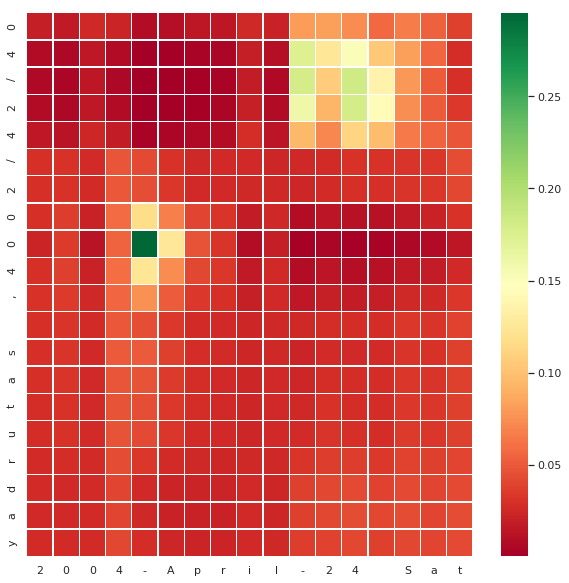

In [16]:
example = [gen_date() for _ in range(1)]
plot_attention(model, example, char_indices, indices_char, in_seq_len)